In [1]:
import os
from PIL import Image
import pandas as pd


In [2]:
# Set the main folder path
main_folder = '/file location'

In [3]:
# Initialize lists to store image paths and corresponding labels
image_paths = []
labels = []

# Iterate through subfolders and their files
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    
    # Check if the subfolder is a directory
    if os.path.isdir(subfolder_path):
        for file_name in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file_name)
            
            # Check if the file is an image (you can add more extensions if needed)
            if file_name.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                image_paths.append(file_path)
                labels.append(subfolder)


In [ ]:

# Create a DataFrame to store image paths and labels
data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)

# Print the DataFrame (optional)
print(df)

In [ ]:
import matplotlib.pyplot as plt

# Display random images
# Define the number of random images to load per class
num_random_images_per_class = 1
for _ in range(num_random_images_per_class):
    for subfolder in df['Label'].unique():
        # Select a random image from the current class
        random_image = df[df['Label'] == subfolder].sample(1)
        
        # Load and display the image
        img = Image.open(random_image['Image_Path'].values[0])
        plt.figure()
        plt.imshow(img)
        plt.title(f'Class: {subfolder}')
        plt.axis('off')

plt.show()

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the value counts of the categorical variable
print(df['Label'].value_counts().to_string())

Butterfly                1875
Moths and butterflies    1429
Lizard                   1200
Spider                    856
Fish                      835
Monkey                    770
Eagle                     719
Frog                      588
Snake                     562
Duck                      542
Caterpillar               494
Sparrow                   475
Jellyfish                 457
Parrot                    421
Owl                       406
Horse                     400
Ladybug                   392
Tortoise                  391
Chicken                   388
Penguin                   377
Snail                     370
Squirrel                  367
Deer                      327
Tiger                     313
Crab                      309
Shark                     303
Giraffe                   298
Goose                     289
Whale                     287
Starfish                  248
Harbor seal               240
Sea turtle                239
Swan                      233
Polar bear

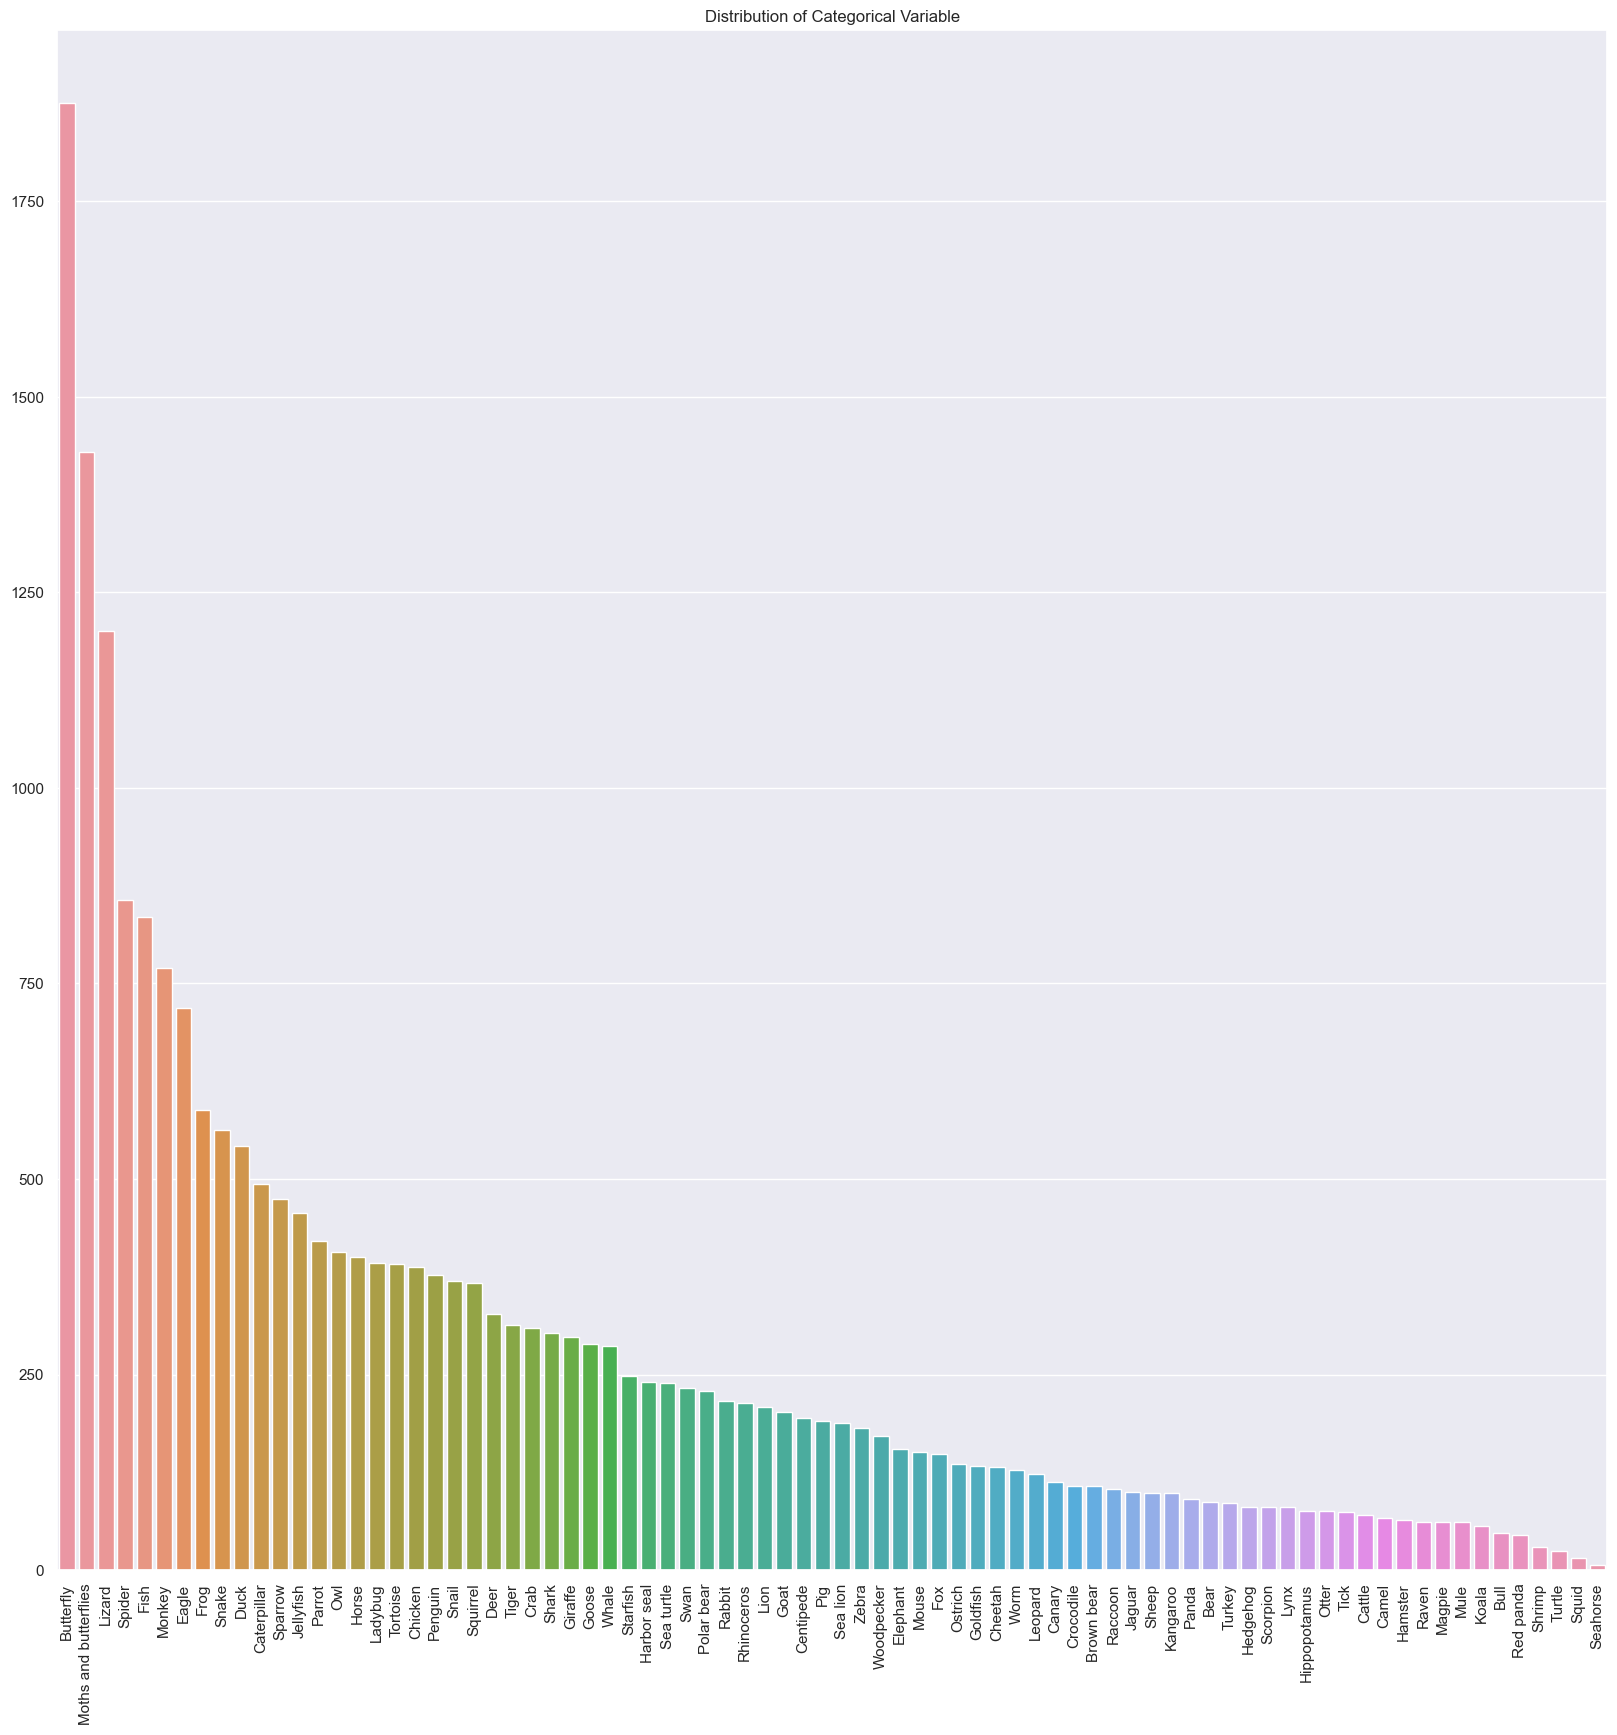

In [15]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column named 'Label' containing the categories

# Get the count of each category
category_counts = df['Label'].value_counts()

# Sort the category_counts series based on the count values in descending order
sorted_categories = category_counts.sort_values(ascending=False)

# Plot a bar chart to visualize the distribution of categories
sns.set(rc={'figure.figsize':(20, 20)}) # Specify the width and height of the chart
sns.barplot(x=sorted_categories.index, y=sorted_categories.values)
plt.title('Distribution of Categorical Variable')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()

In [7]:
# Calculate the proportion of each category
category_proportions = df['Label'].value_counts(normalize=True)
print(category_proportions.to_string())

Butterfly                0.083090
Moths and butterflies    0.063325
Lizard                   0.053177
Spider                   0.037933
Fish                     0.037003
Monkey                   0.034122
Eagle                    0.031862
Frog                     0.026057
Snake                    0.024905
Duck                     0.024018
Caterpillar              0.021891
Sparrow                  0.021049
Jellyfish                0.020252
Parrot                   0.018656
Owl                      0.017992
Horse                    0.017726
Ladybug                  0.017371
Tortoise                 0.017327
Chicken                  0.017194
Penguin                  0.016707
Snail                    0.016396
Squirrel                 0.016263
Deer                     0.014491
Tiger                    0.013870
Crab                     0.013693
Shark                    0.013427
Giraffe                  0.013206
Goose                    0.012807
Whale                    0.012718
Starfish      

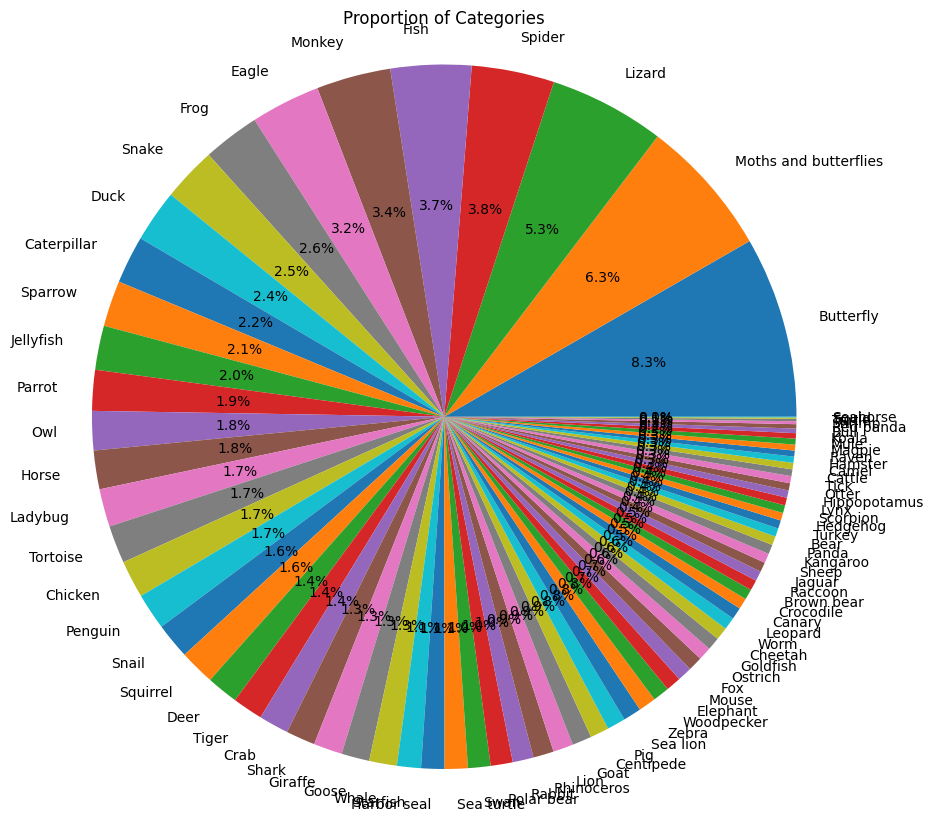

In [12]:
# Plot a pie chart to visualize the proportion of categories
plt.figure(figsize=(10, 10))
plt.pie(category_proportions, labels=category_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of Categories')
plt.axis('equal')
plt.show()

## Taking only first 5 most frequent class

In [23]:
import pandas as pd


# Count the frequency of each class
class_counts = df['Label'].value_counts()

# Get the first 5 most frequent classes
top_classes = class_counts.head(5).index

# Print the result
print("The first 5 most frequent classes are:")
print(top_classes)


The first 5 most frequent classes are:
Index(['Butterfly', 'Moths and butterflies', 'Lizard', 'Spider', 'Fish'], dtype='object')


In [24]:
subset_df = df[df['Label'].isin(top_classes)]

In [25]:
subset_df.head(10)

,Image_Path,Label
242,C:/Users/tonyr/Downloads/Tony/Loyalist_College...,Butterfly
243,C:/Users/tonyr/Downloads/Tony/Loyalist_College...,Butterfly
244,C:/Users/tonyr/Downloads/Tony/Loyalist_College...,Butterfly
245,C:/Users/tonyr/Downloads/Tony/Loyalist_College...,Butterfly
246,C:/Users/tonyr/Downloads/Tony/Loyalist_College...,Butterfly
247,C:/Users/tonyr/Downloads/Tony/Loyalist_College...,Butterfly
248,C:/Users/tonyr/Downloads/Tony/Loyalist_College...,Butterfly
249,C:/Users/tonyr/Downloads/Tony/Loyalist_College...,Butterfly
250,C:/Users/tonyr/Downloads/Tony/Loyalist_College...,Butterfly
251,C:/Users/tonyr/Downloads/Tony/Loyalist_College...,Butterfly


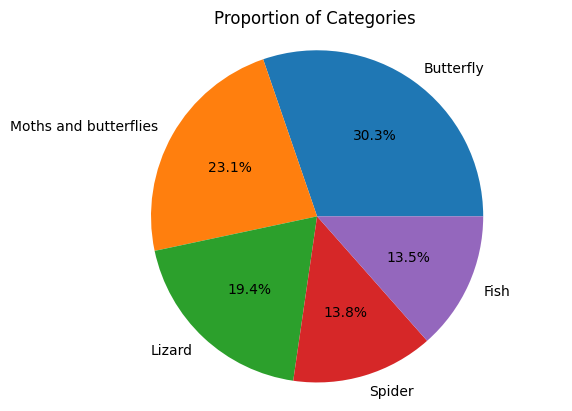

In [26]:

# Plot a pie chart to visualize the proportion of categories
category_proportions = subset_df['Label'].value_counts(normalize=True)
plt.pie(category_proportions, labels=category_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of Categories')
plt.axis('equal')
plt.show()

# Basic Model

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [33]:

# Define image preprocessing parameters
image_size = (224, 224)  

batch_size = 32

# Split the data into features (image paths) and target labels
X = subset_df['Image_Path']
y = subset_df['Label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
# Create an ImageDataGenerator for data augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=20,   # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    horizontal_flip=True  # Random horizontal flip
)

# Create generators for training and testing data
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': X_train, 'label': y_train}),
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': X_test, 'label': y_test}),
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Feature extraction (e.g., using HOG, color histograms) for traditional models
# X_train_features = ...
# X_test_features = ...



Found 4956 validated image filenames belonging to 5 classes.
Found 1239 validated image filenames belonging to 5 classes.


In [37]:
# Models
nb_classifier = MultinomialNB()
svm_classifier = SVC(kernel='linear')
knn_classifier = KNeighborsClassifier(n_neighbors=3)
dt_classifier = DecisionTreeClassifier()

num_classes = 5

# Build a simple CNN model for comparison
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the CNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(train_generator, epochs=5, validation_data=test_generator)



Epoch 1/5
155/155 [==============================] - 360s 2s/step - loss: 1.4695 - accuracy: 0.3965 - val_loss: 1.3807 - val_accuracy: 0.4399
Epoch 2/5
155/155 [==============================] - 250s 2s/step - loss: 1.3613 - accuracy: 0.4324 - val_loss: 1.3455 - val_accuracy: 0.4487
Epoch 3/5
155/155 [==============================] - 254s 2s/step - loss: 1.3357 - accuracy: 0.4485 - val_loss: 1.2888 - val_accuracy: 0.4617
Epoch 4/5
155/155 [==============================] - 244s 2s/step - loss: 1.3101 - accuracy: 0.4625 - val_loss: 1.2745 - val_accuracy: 0.4746
Epoch 5/5
155/155 [==============================] - 241s 2s/step - loss: 1.2731 - accuracy: 0.4722 - val_loss: 1.2995 - val_accuracy: 0.4730


In [40]:
# Evaluate the CNN model
y_pred_cnn = model.predict(test_generator)


39/39 [==============================] - 36s 929ms/step


In [41]:
y_pred_labels_cnn = [tf.argmax(pred).numpy() for pred in y_pred_cnn]
y_true_labels = test_generator.labels

# Print the classification report for the CNN model
print("Classification Report for CNN:\n", classification_report(y_true_labels, y_pred_labels_cnn))

Classification Report for CNN:
               precision    recall  f1-score   support

           0       0.28      0.18      0.22       390
           1       0.14      0.08      0.10       170
           2       0.17      0.32      0.22       225
           3       0.22      0.35      0.27       284
           4       0.12      0.03      0.05       170

    accuracy                           0.21      1239
   macro avg       0.19      0.19      0.17      1239
weighted avg       0.21      0.21      0.19      1239

